In [1]:
import autograd
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt

import torch

# Data

In [2]:
_data = np.pi * (np.random.rand(10000, 1) * 2 - 1)
_label = np.cos(_data) + 2 

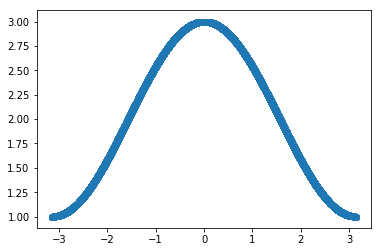

In [3]:
plt.scatter(_data, _label)

# Pytorch

In [53]:
m = torch.nn.Linear(1, 32)
print(list(m.parameters())[1])

Parameter containing:
tensor([ 0.0638,  0.3249,  0.5083,  0.3467,  0.7516, -0.7928,  0.0590,  0.8775,
        -0.3495, -0.7259,  0.1409, -0.7183, -0.5375,  0.2223,  0.5024,  0.1949,
        -0.3445,  0.7743, -0.2592, -0.3917,  0.5678,  0.4878, -0.0292,  0.9831,
        -0.1062,  0.8928,  0.4873, -0.6441, -0.3869, -0.4128, -0.3995,  0.9203],
       requires_grad=True)


0 4.2626495361328125
100 0.08403956145048141
200 0.010923219844698906
300 0.00204474781639874
400 0.0012748800218105316


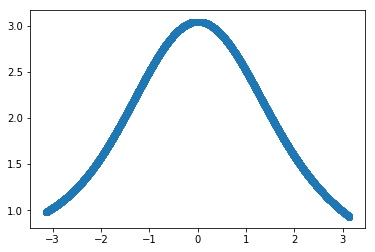

In [54]:
mm = torch.nn.Sequential(torch.nn.Linear(1, 32), 
                         torch.nn.Tanh(), 
                         torch.nn.Linear(32, 32),
                         torch.nn.Tanh(),
                         torch.nn.Linear(32, 1))

def train(mm):
    
    data = torch.tensor(_data, dtype=torch.float32)
    label = torch.tensor(_label, dtype=torch.float32)
    
    for i in range(500):
        
        out = mm(data)
        loss = ((out-label)**2).mean()
        
        mm.zero_grad()
        loss.backward()
        for p in mm.parameters():
            p.data.sub_(0.01 * p.grad.data)

        if i % 100 == 0:
            print(i, loss.item())

train(mm)


plt.scatter(_data, mm(torch.tensor(_data, dtype=torch.float32)).data.numpy())

# Tensor

In [55]:
class Model(autograd.Module):
    def __init__(self, ):
        super().__init__()
        self.l1 = autograd.Linear(1, 32)
        self.l2 = autograd.Linear(32, 32)
        self.l3 = autograd.Linear(32, 1)
    
        self.w1 = autograd.Parameter(1, 32)
        self.b1 = autograd.Parameter(32)
        self.w2 = autograd.Parameter(32, 32)
        self.b2 = autograd.Parameter(32)
        self.w3 = autograd.Parameter(32, 1)
        self.b3 = autograd.Parameter(1)
        
    def forward(self, data):
        out = autograd.tanh(self.l1(data))
        out = autograd.tanh(self.l2(out))
        out = self.l3(out)
        # out = autograd.relu(data @ self.w1 + self.b1)
        # out = autograd.relu(out @ self.w2 + self.b2)
        # out = out @ self.w3 + self.b3
        
        return out

In [56]:
model = Model()
for n, p in model.named_parameters():
    print(n, p.shape, id(p), p.sum())
    break

Model.b1 (32,) 139943876458256 Tensor(3.8146589694445505, requires_grad=True)


0 5.967035472306511
100 0.02041413409053672
200 0.003870165616701825
300 0.00263710417019857
400 0.0020980648230530504


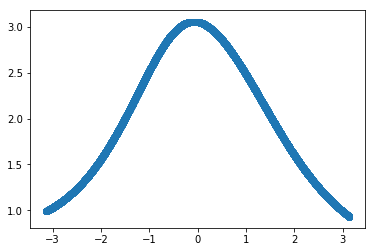

In [57]:
model = Model()

def train(model):
    
    data = autograd.Tensor(_data)
    label = autograd.Tensor(_label)

    lr = 0.01
    
    for i in range(500):
        
        model.zero_grad()
        
        out = model(data)
        loss = ((out - label) ** 2).mean()
        loss.backward()
        
        for p in model.parameters():
            p.sub_(p.grad * lr)
            
        if i % 100 == 0:
            print(i, loss.data)

train(model)

plt.scatter(_data, model(autograd.Tensor(_data)).data)

# Variable

0 3.8338000959809784
200 0.01800979695135662
400 0.008133866760339954


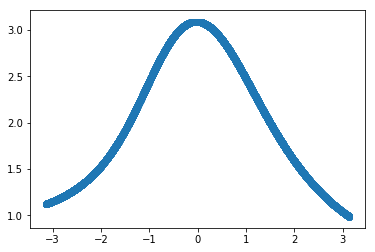

In [7]:
from autograd import variable as L

class Model(L.Module):
    def __init__(self, ):
        super().__init__()
        self.l1 = L.Linear(1, 32)
        self.l2 = L.Linear(32, 32)
        self.l3 = L.Linear(32, 1)
        
    def forward(self, data):
        out = self.l1(data).tanh()
        out = self.l2(out).tanh()
        out = self.l3(out)        
        return out

def train(model):
    ''''''
    data = L.Variable(_data)
    label = L.Variable(_label)
    lr = 0.01

    for i in range(500):
        
        model.zero_grad()
        out = model(data)
        loss = ((out - label) ** 2).mean()
        loss.backward()
        
        for p in model.parameters():
            p.data -= p.grad * lr
            
        if i % 200 == 0:
            print(i, loss.data)

model = Model()
train(model)

plt.scatter(_data, model(L.Variable(_data)).data)

# Linear

In [10]:
import torch
print(torch.__version__)

1.7.1+cpu


In [11]:
a = np.random.rand(3, 10)
b = np.random.rand(10, 4)
c = np.random.rand(4)

In [12]:
x = torch.tensor(a, requires_grad=True)
m = torch.tensor(b, requires_grad=True)
k = torch.tensor(c, requires_grad=True)
y = x @ m + k
y = y.mean()
y.backward()

print(x.grad)
print(m.grad)
print(k.grad)

tensor([[0.1869, 0.1578, 0.2445, 0.0844, 0.1781, 0.1685, 0.2248, 0.1689, 0.2294,
         0.1556],
        [0.1869, 0.1578, 0.2445, 0.0844, 0.1781, 0.1685, 0.2248, 0.1689, 0.2294,
         0.1556],
        [0.1869, 0.1578, 0.2445, 0.0844, 0.1781, 0.1685, 0.2248, 0.1689, 0.2294,
         0.1556]], dtype=torch.float64)
tensor([[0.1649, 0.1649, 0.1649, 0.1649],
        [0.1437, 0.1437, 0.1437, 0.1437],
        [0.1629, 0.1629, 0.1629, 0.1629],
        [0.1172, 0.1172, 0.1172, 0.1172],
        [0.1809, 0.1809, 0.1809, 0.1809],
        [0.1158, 0.1158, 0.1158, 0.1158],
        [0.1299, 0.1299, 0.1299, 0.1299],
        [0.1790, 0.1790, 0.1790, 0.1790],
        [0.1385, 0.1385, 0.1385, 0.1385],
        [0.0877, 0.0877, 0.0877, 0.0877]], dtype=torch.float64)
tensor([0.2500, 0.2500, 0.2500, 0.2500], dtype=torch.float64)


In [13]:
x = autograd.Tensor(a, requires_grad=True)
m = autograd.Tensor(b, requires_grad=True)
k = autograd.Tensor(c, requires_grad=True)
y = x @ m + k
y = y.mean()
y.backward()

print(x.grad)
print(m.grad)
print(k.grad)

Tensor([[0.18688144 0.15779882 0.24448769 0.08436911 0.17809448 0.16852404
  0.22479413 0.16887422 0.22936624 0.15561448]
 [0.18688144 0.15779882 0.24448769 0.08436911 0.17809448 0.16852404
  0.22479413 0.16887422 0.22936624 0.15561448]
 [0.18688144 0.15779882 0.24448769 0.08436911 0.17809448 0.16852404
  0.22479413 0.16887422 0.22936624 0.15561448]], requires_grad=False)
Tensor([[0.16492404 0.16492404 0.16492404 0.16492404]
 [0.14368615 0.14368615 0.14368615 0.14368615]
 [0.16292484 0.16292484 0.16292484 0.16292484]
 [0.11715305 0.11715305 0.11715305 0.11715305]
 [0.18091596 0.18091596 0.18091596 0.18091596]
 [0.11580235 0.11580235 0.11580235 0.11580235]
 [0.12991462 0.12991462 0.12991462 0.12991462]
 [0.17895063 0.17895063 0.17895063 0.17895063]
 [0.1385025  0.1385025  0.1385025  0.1385025 ]
 [0.0877447  0.0877447  0.0877447  0.0877447 ]], requires_grad=False)
Tensor([0.25 0.25 0.25 0.25], requires_grad=False)


In [14]:
x = torch.tensor(a, requires_grad=True)

y = torch.tanh(x)
y.mean().backward()

print(x.grad)

tensor([[0.0245, 0.0259, 0.0316, 0.0225, 0.0223, 0.0308, 0.0317, 0.0257, 0.0226,
         0.0333],
        [0.0146, 0.0309, 0.0144, 0.0275, 0.0171, 0.0330, 0.0160, 0.0193, 0.0290,
         0.0148],
        [0.0277, 0.0155, 0.0201, 0.0303, 0.0224, 0.0140, 0.0281, 0.0174, 0.0227,
         0.0333]], dtype=torch.float64)


In [15]:
x = autograd.Tensor(a, requires_grad=True)

y = autograd.tanh(x)
y.mean().backward()

print(x.grad)

Tensor([[0.02446465 0.02590858 0.03156002 0.02252485 0.02227831 0.03079199
  0.03165118 0.02565502 0.02258633 0.03326203]
 [0.014609   0.03085709 0.01442654 0.02747511 0.01712319 0.03295664
  0.01596533 0.01925116 0.0289865  0.01479992]
 [0.02770542 0.01549513 0.02013729 0.03028063 0.02237397 0.01401094
  0.02810433 0.01743241 0.02270721 0.03327018]], requires_grad=False)


# Conv

In [16]:
data = np.random.rand(10, 3, 5, 5).astype(np.float32)
# print(data)

In [17]:
tensor = torch.tensor(data, requires_grad=True)
conv = torch.nn.Conv2d(3, 10, kernel_size=3, stride=2, padding=1, padding_mode='zeros')

out = conv(tensor)
print(out.shape)
print(out.mean())

out.mean().backward()
# print(out)

print(conv.weight.grad.sum())
print(conv.bias.grad.sum())

torch.Size([10, 10, 3, 3])
tensor(-0.0917, grad_fn=<MeanBackward0>)
tensor(8.0405)
tensor(1.0000)


In [18]:
from autograd import variable

conv2 = variable.Conv2d(3, 10, kernel_size=3, stride=2, padding=1)
conv2.weight.data = conv.weight.data.numpy()
conv2.bias.data = conv.bias.data.numpy()

var = variable.Variable( data, requires_grad=True ) 
out2 = conv2(var)

print(out2.shape)
print(out2.mean().data)

out2.mean().backward()
# print(out2.data)

print(conv2.weight.grad.sum())
print(conv2.bias.grad.sum())

(10, 10, 3, 3)
-0.0916984538128585
8.040525464707752
0.9999999999999999


In [19]:
np.testing.assert_almost_equal(conv.weight.grad.data.numpy(), conv2.weight.grad, decimal=2)
np.testing.assert_almost_equal(conv.bias.grad.data.numpy(), conv2.bias.grad, decimal=2)

In [20]:
np.testing.assert_almost_equal(tensor.grad.data.numpy(), var.grad, decimal=2)

# Pool

## MaxPool

In [21]:
data = np.random.rand(10, 3, 5, 5).astype(np.float32)
# print(data)

In [22]:
maxpool = torch.nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
tensor = torch.tensor(data, requires_grad=True)
out = maxpool(tensor)
print('maxpool, ', out.sum())

out.mean().backward()
print(tensor.grad.sum())

maxpool,  tensor(226.1233, grad_fn=<SumBackward0>)
tensor(1.)


In [23]:
from autograd import variable

var = variable.Variable(data, requires_grad=True)
pool2 = variable.Pool2d(kernel_size=3, stride=2, padding=1)
out = pool2(var)

print(out.sum().data)

out.mean().backward()
print(var.grad.sum())

226.12325838208199
1.0


In [24]:
np.testing.assert_almost_equal(tensor.grad.data.numpy(), var.grad, decimal=2)

## AvgPool

In [25]:
tensor = torch.tensor(data, requires_grad=True)

avgpool = torch.nn.AvgPool2d(kernel_size=3, stride=2, padding=1)
out = avgpool(tensor)
print('avgpool, ', out.sum())

out.mean().backward()
print(tensor.grad.sum())

avgpool,  tensor(80.9744, grad_fn=<SumBackward0>)
tensor(0.6049)


In [26]:
from autograd import variable

var = variable.Variable(data, requires_grad=True)
pool2 = variable.Pool2d(kernel_size=3, stride=2, padding=1, mode='avg')

out = pool2(var)

print(out.sum().data)

out.mean().backward()
print(var.grad.sum())

80.97442700301568
0.60493827


In [27]:
np.testing.assert_almost_equal(tensor.grad.data.numpy(), var.grad, decimal=2)

# BN

In [28]:
from autograd import variable
import torch
import numpy as np

In [29]:
bn_var = variable.BatchNorm2d(8, eps=1e-5, momentum=0.1, affine=True, track_running_stats=True, training=True)
bn = torch.nn.BatchNorm2d(8, eps=1e-5, momentum=0.1, affine=True, track_running_stats=True)

In [30]:
print(bn.weight.data.numpy())
print(bn.bias.data.numpy())
print(' ----------- ')
print(bn_var.weight.data)
print(bn_var.bias.data)

[1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0.]
 ----------- 
[1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0.]


In [31]:
from autograd import variable
import torch
import numpy as np

data = np.random.rand(3, 8, 10, 10).astype(np.float32)
bn = torch.nn.BatchNorm2d(8, eps=1e-5, momentum=0.1, affine=True, track_running_stats=True)
bn_var = variable.BatchNorm2d(8, eps=1e-5, momentum=0.1, affine=True, track_running_stats=True, training=True)

t = torch.tensor(data, requires_grad=True)
out_t = bn(t)
out_t.mean().backward()

print('-------------------------')

v = variable.Variable(data, requires_grad=True)
out_v = bn_var(v)
out_v.mean().backward()

np.testing.assert_almost_equal(out_t.data.numpy(), out_v.data, decimal=4)
np.testing.assert_almost_equal(bn.running_mean.data.numpy(), bn_var.running_mean, decimal=4)
np.testing.assert_almost_equal(bn.running_var.data.numpy(), bn_var.running_var, decimal=4)
np.testing.assert_almost_equal(bn.weight.data.numpy(), bn_var.weight.data, decimal=4)
np.testing.assert_almost_equal(bn.bias.data.numpy(), bn_var.bias.data, decimal=4)
np.testing.assert_almost_equal(t.grad.data.numpy(), v.grad, decimal=4)

-------------------------


In [32]:
print(bn.weight.grad.mean())
print(bn.bias.grad.mean())

tensor(9.5408e-10)
tensor(0.1250)


In [33]:
print(bn_var.weight.grad.mean())
print(bn_var.bias.grad.mean())

4.103036796026415e-09
0.12499999999999999


In [34]:
t = torch.tensor(data, requires_grad=True)
x = t**2 / t * 4
x.mean(dim=(0, 2, 3)).sum().backward()


v = variable.Variable(data, requires_grad=True)
y = v**2 / v * 4
y.mean(axis=(0, 2, 3)).sum().backward()

np.testing.assert_almost_equal(t.grad.data.numpy(), v.grad, decimal=3)

In [35]:
t.var(dim=(0,2,3))

tensor([0.0747, 0.0864, 0.0834, 0.0862, 0.0797, 0.0866, 0.0874, 0.0843],
       grad_fn=<VarBackward1>)

In [36]:
((v - v.mean(axis=(0, 2, 3), keepdims=True))**2).mean(axis=(0, 2, 3)).data

array([0.07448433, 0.08608203, 0.08315919, 0.08595478, 0.079464  ,
       0.08630648, 0.08714981, 0.08404162], dtype=float32)

In [37]:
data.var(axis=(0, 2, 3))

array([0.07448433, 0.08608203, 0.08315919, 0.08595478, 0.079464  ,
       0.08630648, 0.08714981, 0.08404162], dtype=float32)

In [38]:
t.grad.data.numpy().sum()

32.0

In [39]:
v.grad.sum()

32.000004

In [127]:
np.testing.assert_almost_equal(t.grad.data.numpy(), v.grad, decimal=4)

In [129]:
class MM(L.Module):
    def __init__(self, traning=True):
        
        self.conv = L.Conv2d(3, 32, kernel_size=3, stride=2, padding=1)
        self.bn = L.BatchNorm2d(32, affine=True, training=traning, track_running_stats=True)
        self.pool = L.Pool2d(kernel_size=3, stride=2, padding=1, mode='max')
        self.l1 = L.Linear(32 * 40 * 40, 100)
        
    
    def forward(self, data):
        n, _, _, _ = data.shape
        out = self.conv(data)
        out = self.bn(out.relu())
        out = self.pool(out)
        out = self.l1(out.reshape(n, -1))
        
        return out

In [130]:
data = L.Variable(np.random.rand(8, 3, 160, 160))
label = L.Variable(np.random.rand(8, 100))

mm = MM()
out = mm(data)

loss = ((out - label) ** 2).mean()
loss.backward()


print('out shape:', out.shape)

for n, p in mm.named_parameters():
    print(p.shape, p.grad.shape)

out shape: (8, 100)
(32,) (32,)
(32,) (32,)
(32,) (32,)
(32, 3, 3, 3) (32, 3, 3, 3)
(100,) (100,)
(51200, 100) (51200, 100)
